In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# CSV-Dateien einlesen
# -------------------------------
firmen_df = pd.read_csv('firmen_ergebnisse.csv', delimiter=";", encoding='utf-8-sig', decimal=",")
fahrzeuge_df = pd.read_csv('fahrzeuge_ergebnisse.csv', delimiter=";", encoding='utf-8-sig', decimal=",")
ladesaeulen_df = pd.read_csv('ladesaeulen_ergebnisse.csv', delimiter=";", encoding='utf-8-sig', decimal=",")

# Übersicht der ersten Zeilen
display(firmen_df.head())
display(fahrzeuge_df.head())
display(ladesaeulen_df.head())

# -------------------------------
# Globales Mapping: company_id -> Wirtschaftszweig
# -------------------------------
mapping_company = {
    100100: "Verarbeitendes Gewerbe",
    100600: "Verkehr und Lagerei",
    100700: "Sonst. wirtschaftl. Dienstl.",
    100800: "Baugewerbe"
}
firmen_df['Wirtschaftszweig'] = firmen_df['company_id'].map(mapping_company)
# Übernehme auch für fahrzeuge_df, damit diese Plots auf dem Mapping basieren
fahrzeuge_df['Wirtschaftszweig'] = fahrzeuge_df['company_id'].map(mapping_company)

# -------------------------------
# Mapping für Fahrzeuggrößen
# -------------------------------
vehicle_size_mapping = {
    1: "Klein",
    2: "Mittel",
    3: "Groß",
    4: "Transporter",
    5: "Sonstige"
}
# Falls die Spalte numerisch ist – ansonsten in int konvertieren
fahrzeuge_df['vehicle_size'] = fahrzeuge_df['vehicle_size'].astype(int).map(vehicle_size_mapping)


,company_id,total_vehicles,electrifiable_vehicles,non_electrifiable_vehicles,total_distance_km,charger_power_used,chargers_needed,max_load_kW,avg_load_kW,total_consumption_kWh,total_charging_time_min,total_block_time_min,total_waiting_time_min
0,100100,10,4,6,16848.17,22.0,2,44.0,4.95,821.72,2115.65,35028.35,0.0
1,100600,10,4,6,38720.53,22.0,3,66.0,6.11,2300.45,6060.39,13586.61,0.0
2,100700,10,7,3,13312.38,50.0,1,50.0,3.51,580.9,406.61,8884.39,0.0
3,100800,10,9,1,8093.76,3.7,4,14.8,3.39,1278.44,18863.04,22066.96,0.0


,company_id,vehicle_id,vehicle_size,total_distance_km,longest_trip,electrifiable,reason,charger_power_used,total_consumption_kWh,total_charging_time_min,total_block_time_min,total_waiting_time_min,min_SoC,max_SoC,final_SoC
0,100100,1107000482,2,2174.19,1013.31,no,Intervall zu lang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100100,1202581942,4,2530.16,153.13,yes,NaN,22.0,503.5,1373.18,15756.82,0.0,20.5,63.8,63.8
2,100100,1208573550,2,1017.5,736.05,no,Intervall zu lang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100100,1208654863,3,2076.77,1643.04,no,Intervall zu lang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100100,1209357301,3,186.08,43.85,yes,NaN,22.0,30.7,0.0,0.0,0.0,87.3,118.0,87.3


,week,day,hour,minute,company_id,charger_id,charger_power,state,load_kW
0,1,1,7,0,100100,C_100100_1,22.0,frei,0.0
1,1,1,7,0,100100,C_100100_2,22.0,frei,0.0
2,1,1,7,1,100100,C_100100_1,22.0,frei,0.0
3,1,1,7,1,100100,C_100100_2,22.0,frei,0.0
4,1,1,7,2,100100,C_100100_1,22.0,frei,0.0


In [2]:
# Allgemeine Plot-Parameter
legend_loc = 'upper left'
legend_bbox = (1.02, 1)

## Größe – Anzahl Fahrzeuge pro Wirtschaftszweig (nach Fahrzeuggröße)

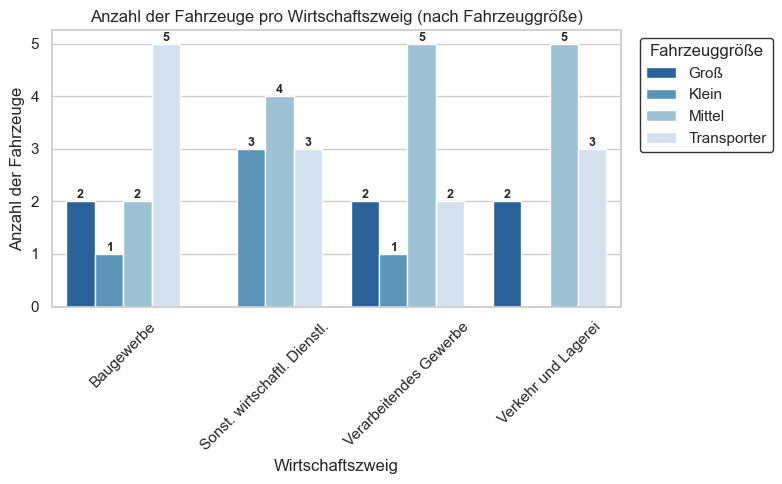

In [3]:
# Einstellbare Parameter
figsize_vehicle = (8, 5)
palette_vehicle = "Blues_r"
rotation_x = 45

# Gruppierung: Anzahl Fahrzeuge pro Wirtschaftszweig und Fahrzeuggröße
vehicle_size_count = fahrzeuge_df.groupby(["Wirtschaftszweig", "vehicle_size"])["vehicle_id"].count().reset_index(name="count")
# Filtere Gruppen mit 0
vehicle_size_count = vehicle_size_count[vehicle_size_count["count"] != 0]

plt.figure(figsize=figsize_vehicle)
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=vehicle_size_count,
    x="Wirtschaftszweig",
    y="count",
    hue="vehicle_size",
    palette=palette_vehicle
)

# Annotiere nur Balken mit Wert > 0
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Anzahl der Fahrzeuge")
plt.title("Anzahl der Fahrzeuge pro Wirtschaftszweig (nach Fahrzeuggröße)")
leg = plt.legend(title="Fahrzeuggröße", loc=legend_loc, bbox_to_anchor=legend_bbox)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_edgecolor('black')
plt.xticks(rotation=rotation_x)
plt.tight_layout()
plt.show()

## Gesamte Laufleistungen (pro Wirtschaftszweig)


C:\Users\pasca\AppData\Local\Temp\ipykernel_6052\1384805845.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\pasca\AppData\Local\Temp\ipykernel_6052\1384805845.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  leg = plt.legend(title="Laufleistung", loc=legend_loc, bbox_to_anchor=legend_bbox)


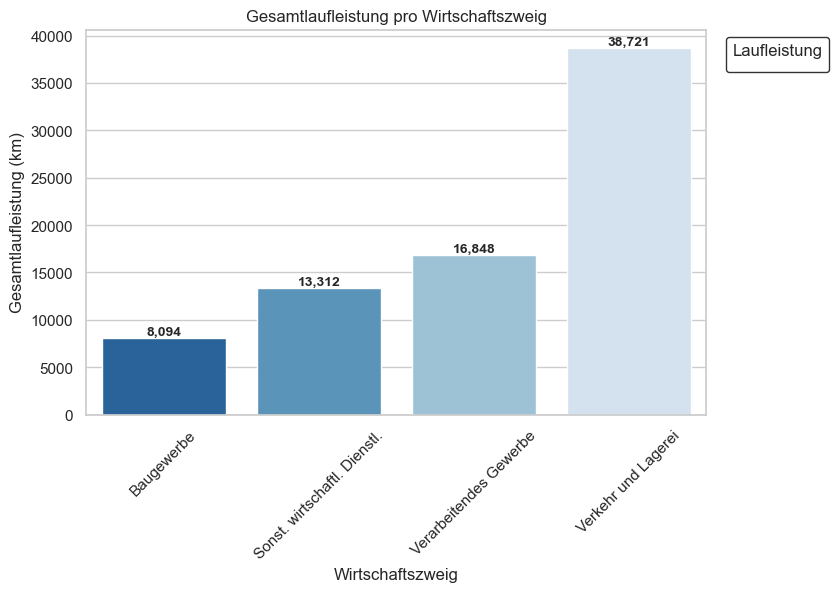

In [4]:
# Parameter
figsize_total_distance = (8, 5)
palette_total_distance = "Blues_r"
rotation_total_distance = 45

# Sicherstellen, dass total_distance_km numerisch ist
fahrzeuge_df["total_distance_km"] = fahrzeuge_df["total_distance_km"].astype(str).str.replace(",", ".").astype(float)
total_distance_per_wirtschaft = fahrzeuge_df.groupby("Wirtschaftszweig")["total_distance_km"].sum().reset_index()
total_distance_per_wirtschaft = total_distance_per_wirtschaft[total_distance_per_wirtschaft["total_distance_km"] != 0]

plt.figure(figsize=figsize_total_distance)
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=total_distance_per_wirtschaft,
    x="Wirtschaftszweig",
    y="total_distance_km",
    palette=palette_total_distance
)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Gesamtlaufleistung (km)")
plt.title("Gesamtlaufleistung pro Wirtschaftszweig")
leg = plt.legend(title="Laufleistung", loc=legend_loc, bbox_to_anchor=legend_bbox)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_edgecolor('black')
plt.xticks(rotation=rotation_total_distance)
plt.show()

## Gesamte Laufleistungen (pro Wirtschaftszweig, nach Fahrzeuggröße)

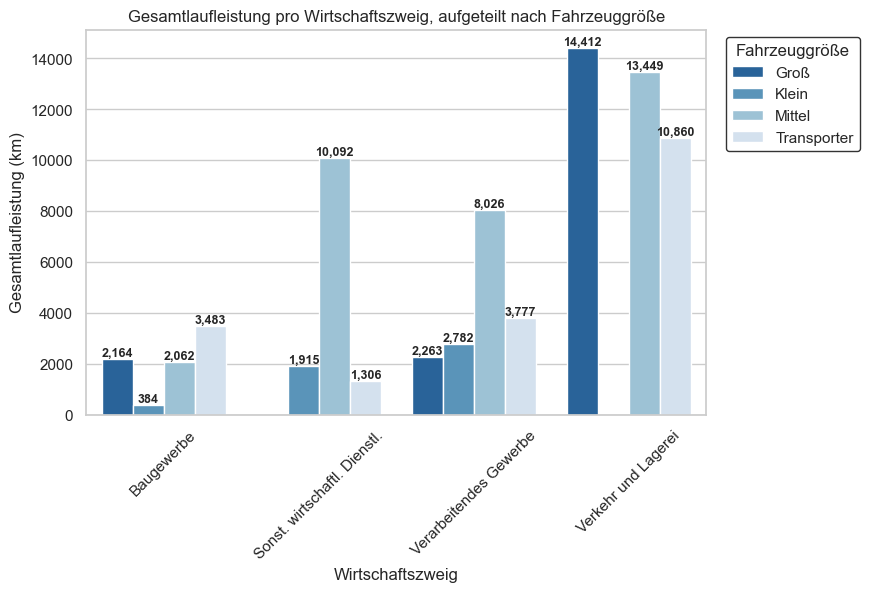

In [5]:
# Parameter
figsize_total_distance_size = (8, 5)
palette_total_distance_size = "Blues_r"
rotation_total_distance_size = 45

total_distance_per_wirtschaft_size = (
    fahrzeuge_df.groupby(["Wirtschaftszweig", "vehicle_size"])["total_distance_km"]
    .sum().reset_index()
)
total_distance_per_wirtschaft_size = total_distance_per_wirtschaft_size[total_distance_per_wirtschaft_size["total_distance_km"] != 0]

plt.figure(figsize=figsize_total_distance_size)
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=total_distance_per_wirtschaft_size,
    x="Wirtschaftszweig",
    y="total_distance_km",
    hue="vehicle_size",
    palette=palette_total_distance_size
)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Gesamtlaufleistung (km)")
plt.title("Gesamtlaufleistung pro Wirtschaftszweig, aufgeteilt nach Fahrzeuggröße")
leg = plt.legend(title="Fahrzeuggröße", loc=legend_loc, bbox_to_anchor=legend_bbox)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_edgecolor('black')
plt.xticks(rotation=rotation_total_distance_size)
plt.show()

## Längste Fahrt (pro Wirtschaftszweig, nach Fahrzeuggröße)

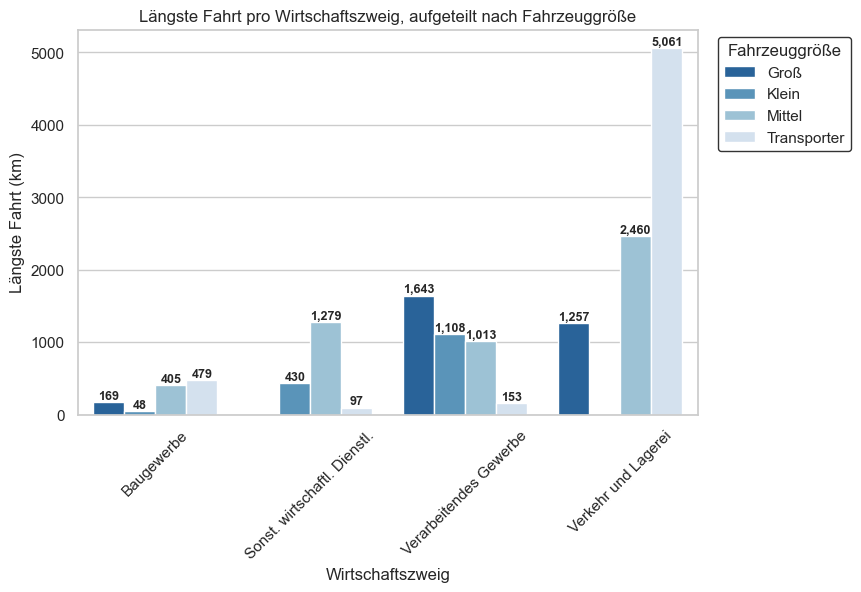

In [6]:
# Parameter
figsize_longest_trip = (8, 5)
palette_longest_trip = "Blues_r"
rotation_longest_trip = 45

fahrzeuge_df["longest_trip"] = fahrzeuge_df["longest_trip"].astype(str).str.replace(",", ".").astype(float)
longest_trip_per_wirtschaft_size = (
    fahrzeuge_df.groupby(["Wirtschaftszweig", "vehicle_size"])["longest_trip"]
    .max().reset_index()
)
longest_trip_per_wirtschaft_size = longest_trip_per_wirtschaft_size[longest_trip_per_wirtschaft_size["longest_trip"] != 0]

plt.figure(figsize=figsize_longest_trip)
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=longest_trip_per_wirtschaft_size,
    x="Wirtschaftszweig",
    y="longest_trip",
    hue="vehicle_size",
    palette=palette_longest_trip
)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Längste Fahrt (km)")
plt.title("Längste Fahrt pro Wirtschaftszweig, aufgeteilt nach Fahrzeuggröße")
leg = plt.legend(title="Fahrzeuggröße", loc=legend_loc, bbox_to_anchor=legend_bbox)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_edgecolor('black')
plt.xticks(rotation=rotation_longest_trip)
plt.show()

# Ab hier: Elektrifizierbarkeit

## Vergleich Elektrifizierbarkeit (gestapelt) pro Wirtschaftszweig und Fahrzeuggröße

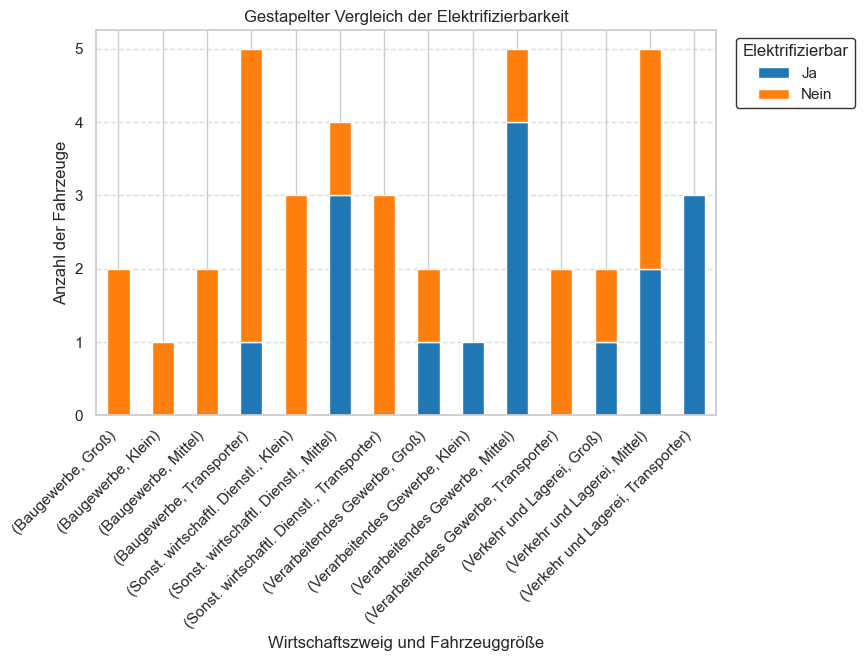

In [7]:
# Parameter
figsize_electr = (8, 5)
rotation_electr = 45
colors_electr = ["#1f77b4", "#ff7f0e"]

unique_wirtschaft = fahrzeuge_df["Wirtschaftszweig"].unique()
unique_sizes = fahrzeuge_df["vehicle_size"].unique()
unique_electrifiable = ["yes", "no"]

full_index = pd.MultiIndex.from_product(
    [unique_wirtschaft, unique_sizes, unique_electrifiable], 
    names=["Wirtschaftszweig", "vehicle_size", "electrifiable"]
)

electrifiable_count = (
    fahrzeuge_df.groupby(["Wirtschaftszweig", "vehicle_size", "electrifiable"])
    .size().reset_index(name="count")
)
electrifiable_count = (electrifiable_count.set_index(["Wirtschaftszweig", "vehicle_size", "electrifiable"])
                        .reindex(full_index, fill_value=0)
                        .reset_index())
electrifiable_pivot = electrifiable_count.pivot_table(
    index=["Wirtschaftszweig", "vehicle_size"],
    columns="electrifiable",
    values="count",
    fill_value=0
).reset_index()
# Filtere Zeilen, in denen die Summe aller Kategorien 0 ist
electrifiable_pivot = electrifiable_pivot[(electrifiable_pivot["no"] + electrifiable_pivot["yes"]) != 0]

ax = electrifiable_pivot.set_index(["Wirtschaftszweig", "vehicle_size"]).plot(
    kind="bar",
    stacked=True,
    figsize=figsize_electr,
    color=colors_electr
)

plt.xlabel("Wirtschaftszweig und Fahrzeuggröße")
plt.ylabel("Anzahl der Fahrzeuge")
plt.title("Gestapelter Vergleich der Elektrifizierbarkeit")
leg = plt.legend(title="Elektrifizierbar", labels=["Ja", "Nein"], loc=legend_loc, bbox_to_anchor=legend_bbox)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_edgecolor('black')
plt.xticks(rotation=rotation_electr, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Anteil elektrifizierbarer Fahrezeuge pro Wirtschaftszweig

C:\Users\pasca\AppData\Local\Temp\ipykernel_6052\1144091248.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  electrifiable_percentage_overall["electrifiable_vehicles"].fillna(0, inplace=True)
C:\Users\pasca\AppData\Local\Temp\ipykernel_6052\1144091248.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\pasca\AppData\Local\Temp\ipykernel_6052\1144091248.py:35:

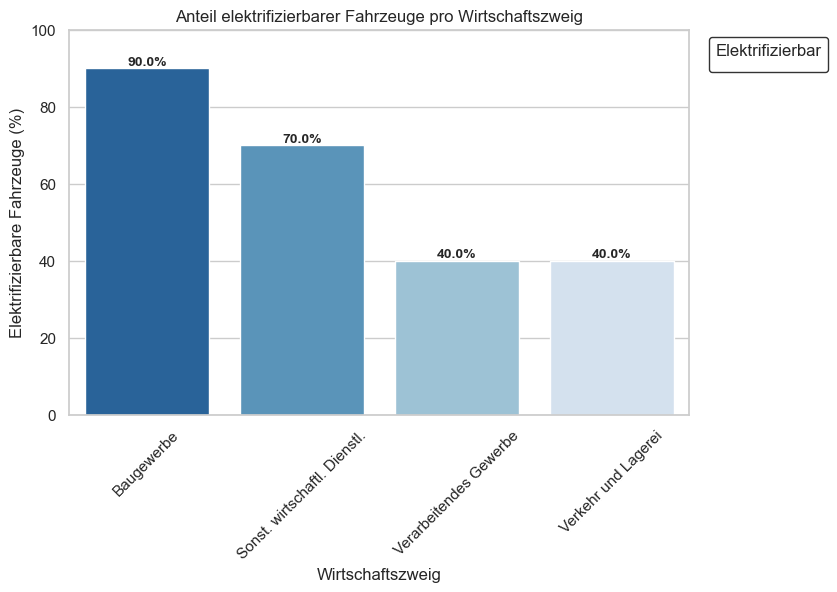

In [8]:
# Parameter
figsize_electr_overall = (8, 5)
palette_electr_overall = "Blues_r"
rotation_electr_overall = 45

total_vehicles_per_wirtschaft = fahrzeuge_df.groupby("Wirtschaftszweig")["vehicle_id"].count().reset_index()
total_vehicles_per_wirtschaft.rename(columns={"vehicle_id": "total_vehicles"}, inplace=True)
electrifiable_per_wirtschaft = fahrzeuge_df[fahrzeuge_df["electrifiable"] == "yes"].groupby("Wirtschaftszweig")["vehicle_id"].count().reset_index()
electrifiable_per_wirtschaft.rename(columns={"vehicle_id": "electrifiable_vehicles"}, inplace=True)
electrifiable_percentage_overall = total_vehicles_per_wirtschaft.merge(electrifiable_per_wirtschaft, on="Wirtschaftszweig", how="left")
electrifiable_percentage_overall["electrifiable_vehicles"].fillna(0, inplace=True)
electrifiable_percentage_overall["electrifiable_percent"] = (electrifiable_percentage_overall["electrifiable_vehicles"] / electrifiable_percentage_overall["total_vehicles"] * 100)
electrifiable_percentage_overall = electrifiable_percentage_overall[electrifiable_percentage_overall["total_vehicles"] != 0]

plt.figure(figsize=figsize_electr_overall)
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=electrifiable_percentage_overall,
    x="Wirtschaftszweig",
    y="electrifiable_percent",
    palette=palette_electr_overall
)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Elektrifizierbare Fahrzeuge (%)")
plt.title("Anteil elektrifizierbarer Fahrzeuge pro Wirtschaftszweig")
plt.xticks(rotation=rotation_electr_overall)
plt.ylim(0, 100)
leg = plt.legend(title="Elektrifizierbar", loc=legend_loc, bbox_to_anchor=legend_bbox)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_edgecolor('black')
plt.show()

## Gründe

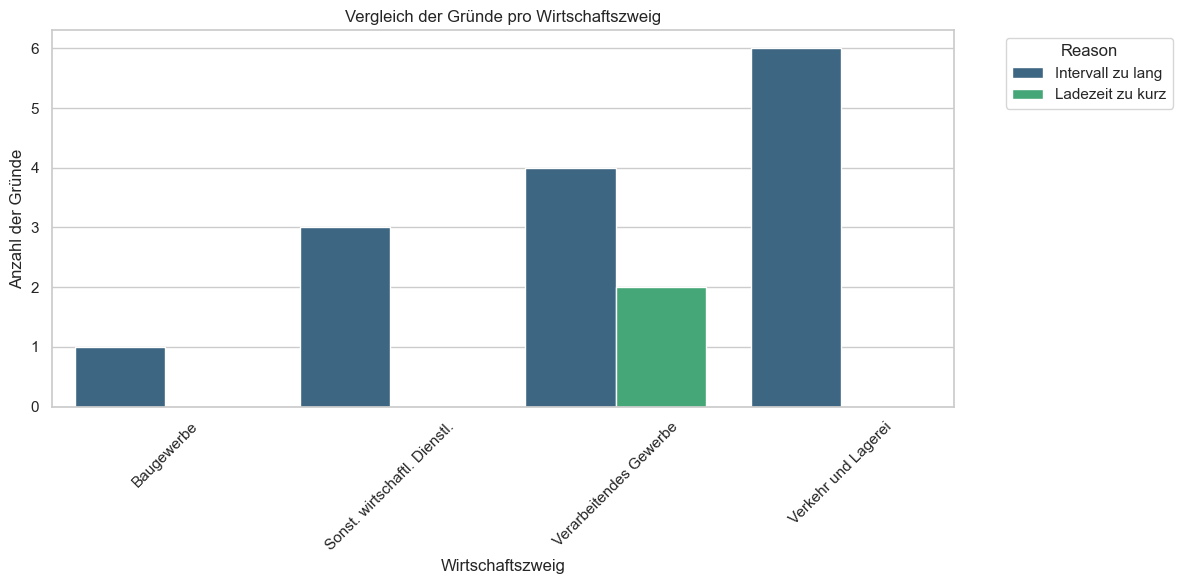

In [9]:
# Gruppierung: Zähle die Vorkommen der einzelnen Gründe je Wirtschaftszweig
reason_counts = fahrzeuge_df.groupby(['Wirtschaftszweig', 'reason']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

ax1 = sns.barplot(
    data=reason_counts,
    x="Wirtschaftszweig",
    y="count",
    hue="reason",
    palette="viridis"
)

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Anzahl der Gründe")
plt.title("Vergleich der Gründe pro Wirtschaftszweig")
plt.xticks(rotation=45)
plt.legend(title="Reason", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Ladesäulen - Nutzung pro Wirtschaftszweig

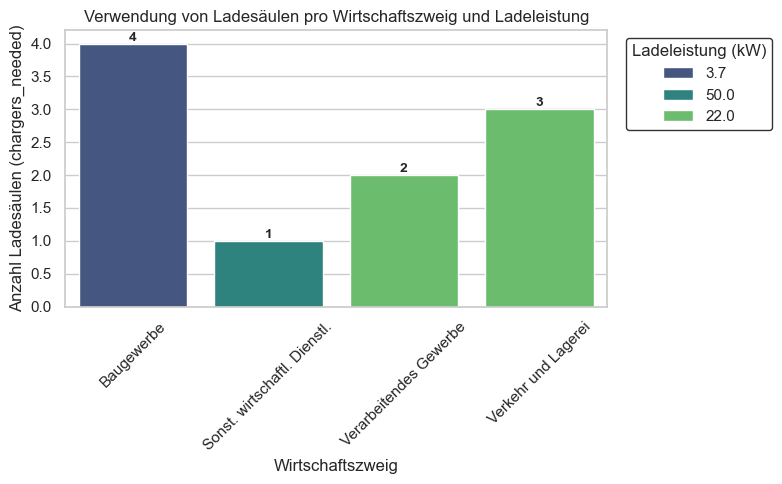

In [10]:
# Parameter
figsize_chargers = (8, 5)
palette_chargers = "viridis"
rotation_chargers = 45

charger_data = firmen_df.groupby(["Wirtschaftszweig", "charger_power_used"])["chargers_needed"].sum().reset_index()
charger_data = charger_data[charger_data["chargers_needed"] != 0]

plt.figure(figsize=figsize_chargers)
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=charger_data,
    x="Wirtschaftszweig",
    y="chargers_needed",
    hue="charger_power_used",
    palette=palette_chargers
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, fontweight='bold')

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Anzahl Ladesäulen (chargers_needed)")
plt.title("Verwendung von Ladesäulen pro Wirtschaftszweig und Ladeleistung")
leg = plt.legend(title="Ladeleistung (kW)", loc=legend_loc, bbox_to_anchor=legend_bbox)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_edgecolor('black')
plt.xticks(rotation=rotation_chargers)
plt.tight_layout()
plt.show()

## Spitzenlast pro Wirtschaftszweig

C:\Users\pasca\AppData\Local\Temp\ipykernel_6052\2979820288.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


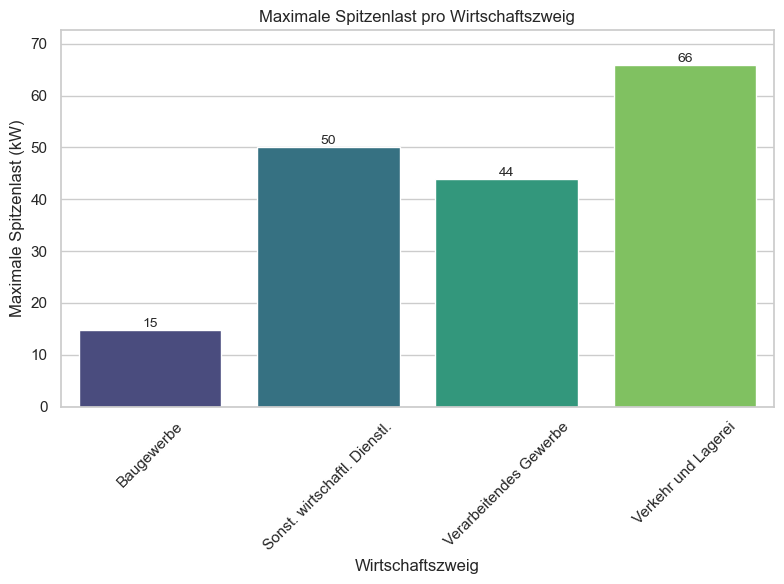

In [11]:
# Gruppierung: Maximale Spitzenlast pro Wirtschaftszweig anhand von max_load_kW ermitteln
spitzenlast = firmen_df.groupby("Wirtschaftszweig")["max_load_kW"].max().reset_index()

# Umwandlung der max_load_kW-Spalte in numerische Werte
spitzenlast["max_load_kW"] = pd.to_numeric(spitzenlast["max_load_kW"], errors='coerce')

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=spitzenlast,
    x="Wirtschaftszweig",
    y="max_load_kW",
    palette="viridis"
)

# Sicherstellen, dass die y-Achse bei 0 beginnt und etwas Spielraum nach oben bietet
plt.ylim(0, spitzenlast["max_load_kW"].max() * 1.1)

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Maximale Spitzenlast (kW)")
plt.title("Maximale Spitzenlast pro Wirtschaftszweig")
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Gesamtverbrauch (kWh) pro Wirtschaftszweig

C:\Users\pasca\AppData\Local\Temp\ipykernel_6052\578618749.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


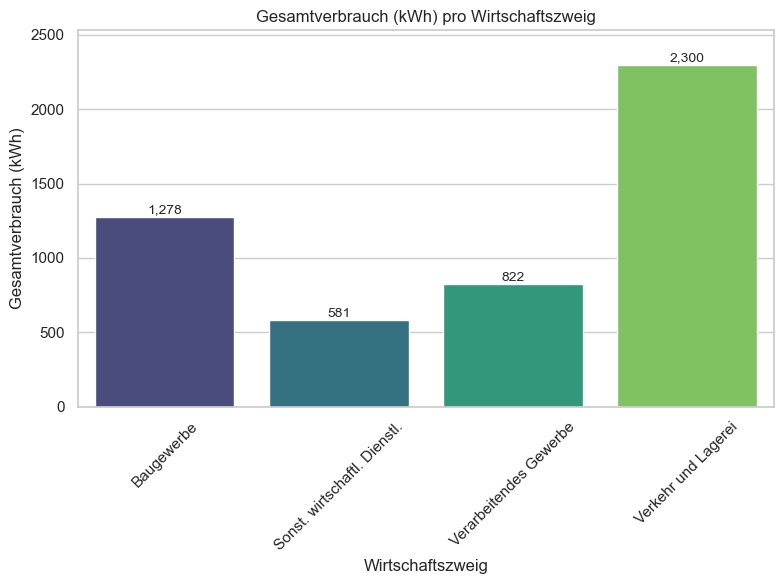

In [12]:
# Gruppierung: Gesamtverbrauch (total_consumption_kWh) pro Wirtschaftszweig ermitteln
verbrauch = firmen_df.groupby("Wirtschaftszweig")["total_consumption_kWh"].sum().reset_index()

# Umwandlung der total_consumption_kWh-Spalte in numerische Werte
verbrauch["total_consumption_kWh"] = pd.to_numeric(verbrauch["total_consumption_kWh"], errors='coerce')

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=verbrauch,
    x="Wirtschaftszweig",
    y="total_consumption_kWh",
    palette="viridis"
)

# Sicherstellen, dass die y-Achse bei 0 beginnt und etwas Spielraum nach oben bietet
plt.ylim(0, verbrauch["total_consumption_kWh"].max() * 1.1)

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Gesamtverbrauch (kWh)")
plt.title("Gesamtverbrauch (kWh) pro Wirtschaftszweig")
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Anzahl elektrifizierbarer Fahrzeuge pro Größe und Wirtschaftszweig

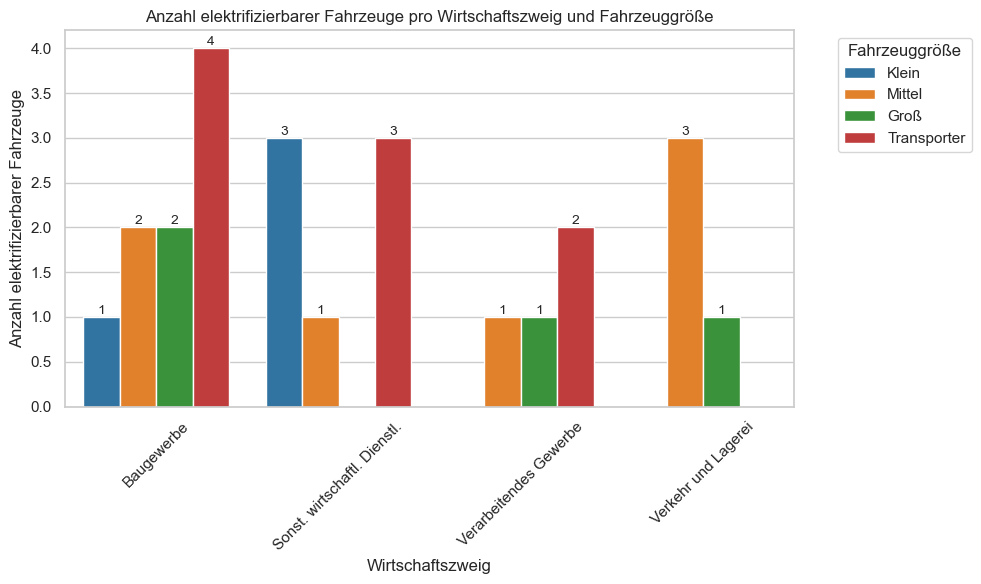

In [13]:
# Filter: Nur elektrifizierbare Fahrzeuge
elektrifizierbare_fahrzeuge = fahrzeuge_df[fahrzeuge_df["electrifiable"] == "yes"].copy()

# Gruppierung: Anzahl der Fahrzeuge pro Wirtschaftszweig und Fahrzeuggröße
count_data = elektrifizierbare_fahrzeuge.groupby(["Wirtschaftszweig", "vehicle_size"])["vehicle_id"] \
    .count() \
    .reset_index(name="count")

# Optional: Herausfiltern von "Sonstige", damit nur die 4 gewünschten Kategorien angezeigt werden
count_data = count_data[count_data["vehicle_size"].isin(["Klein", "Mittel", "Groß", "Transporter"])]

# Reihenfolge für die Fahrzeuggrößen festlegen
vehicle_size_order = ["Klein", "Mittel", "Groß", "Transporter"]
count_data["vehicle_size"] = pd.Categorical(count_data["vehicle_size"],
                                            categories=vehicle_size_order,
                                            ordered=True)

# Benutzerdefinierte Palette für die 4 Fahrzeuggrößen
size_palette = {
    "Klein": "#1f77b4",
    "Mittel": "#ff7f0e",
    "Groß": "#2ca02c",
    "Transporter": "#d62728"
}

# Plot erstellen
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=count_data,
    x="Wirtschaftszweig",
    y="count",
    hue="vehicle_size",
    hue_order=vehicle_size_order,
    palette=size_palette
)

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Anzahl elektrifizierbarer Fahrzeuge")
plt.title("Anzahl elektrifizierbarer Fahrzeuge pro Wirtschaftszweig und Fahrzeuggröße")
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Gesamtlaufleistung elektrifizierbarer Fahrzeuge pro Wirtschaftszweig

C:\Users\pasca\AppData\Local\Temp\ipykernel_6052\1793715513.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


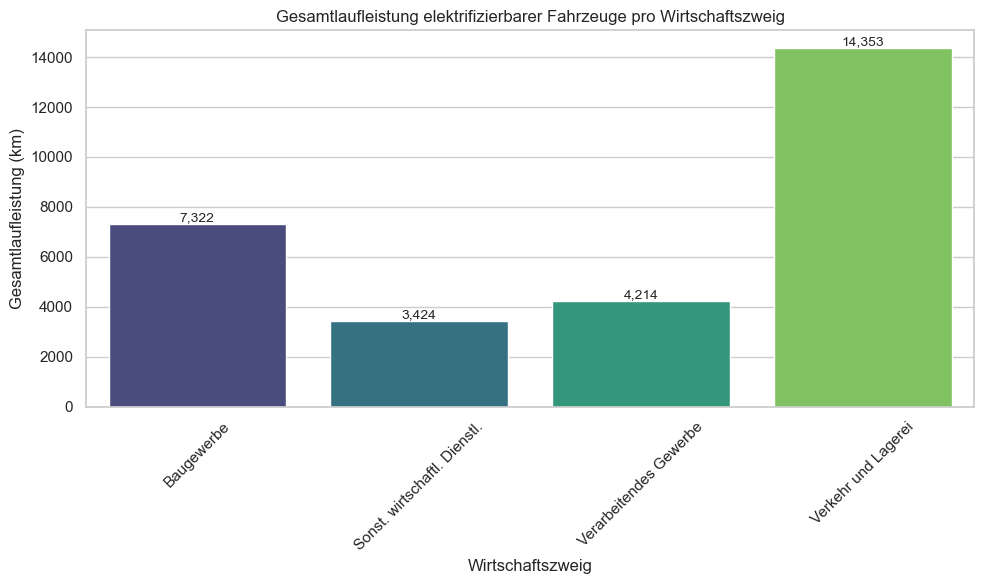

In [24]:
# -------------------------------
# Filter: Nur elektrifizierbare Fahrzeuge
# -------------------------------
elektrifizierbare_fahrzeuge = fahrzeuge_df[fahrzeuge_df["electrifiable"] == "yes"].copy()

# -------------------------------
# Gruppierung: Gesamtlaufleistung (3 Wochen) pro Wirtschaftszweig summieren
# -------------------------------
grouped_data = elektrifizierbare_fahrzeuge.groupby("Wirtschaftszweig")["total_distance_km"]\
    .sum().reset_index()

# -------------------------------
# Plot erstellen
# -------------------------------
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=grouped_data,
    x="Wirtschaftszweig",
    y="total_distance_km",
    palette="viridis"
)

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Gesamtlaufleistung (km)")
plt.title("Gesamtlaufleistung elektrifizierbarer Fahrzeuge pro Wirtschaftszweig")
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Gesamtlaufleistung elektrifizierbarer Fahrzeuge pro Größe und Wirtschaftszweig

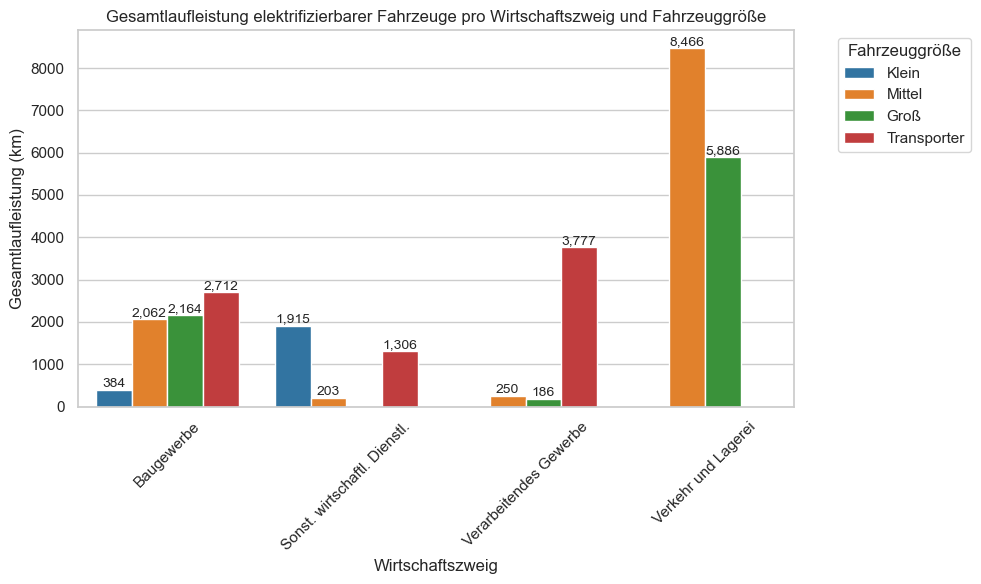

In [14]:
# -------------------------------
# Filter: Nur elektrifizierbare Fahrzeuge
# -------------------------------
elektrifizierbare_fahrzeuge = fahrzeuge_df[fahrzeuge_df["electrifiable"] == "yes"].copy()

# -------------------------------
# Gruppierung nach Wirtschaftszweig und Fahrzeuggröße (Gesamtlaufleistung summieren)
# -------------------------------
grouped_data = elektrifizierbare_fahrzeuge.groupby(["Wirtschaftszweig", "vehicle_size"])\
    ["total_distance_km"].sum().reset_index()

# Filtere "Sonstige" heraus, sodass nur die 4 gewünschten Kategorien angezeigt werden
vehicle_size_order = ["Klein", "Mittel", "Groß", "Transporter"]
grouped_data = grouped_data[grouped_data["vehicle_size"].isin(vehicle_size_order)]

# Fahrzeuggrößen als kategorische Variable in der gewünschten Reihenfolge festlegen
grouped_data["vehicle_size"] = pd.Categorical(grouped_data["vehicle_size"],
                                              categories=vehicle_size_order,
                                              ordered=True)

# -------------------------------
# Benutzerdefinierte Palette für Fahrzeuggrößen
# -------------------------------
size_palette = {
    "Klein": "#1f77b4",
    "Mittel": "#ff7f0e",
    "Groß": "#2ca02c",
    "Transporter": "#d62728",
    "Sonstige": "#9467bd"
}

# -------------------------------
# Plot erstellen
# -------------------------------
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=grouped_data,
    x="Wirtschaftszweig",
    y="total_distance_km",
    hue="vehicle_size",
    hue_order=vehicle_size_order,
    palette=size_palette
)

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Gesamtlaufleistung (km)")
plt.title("Gesamtlaufleistung elektrifizierbarer Fahrzeuge pro Wirtschaftszweig und Fahrzeuggröße")
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Auf ein Jahr hochgerechnet

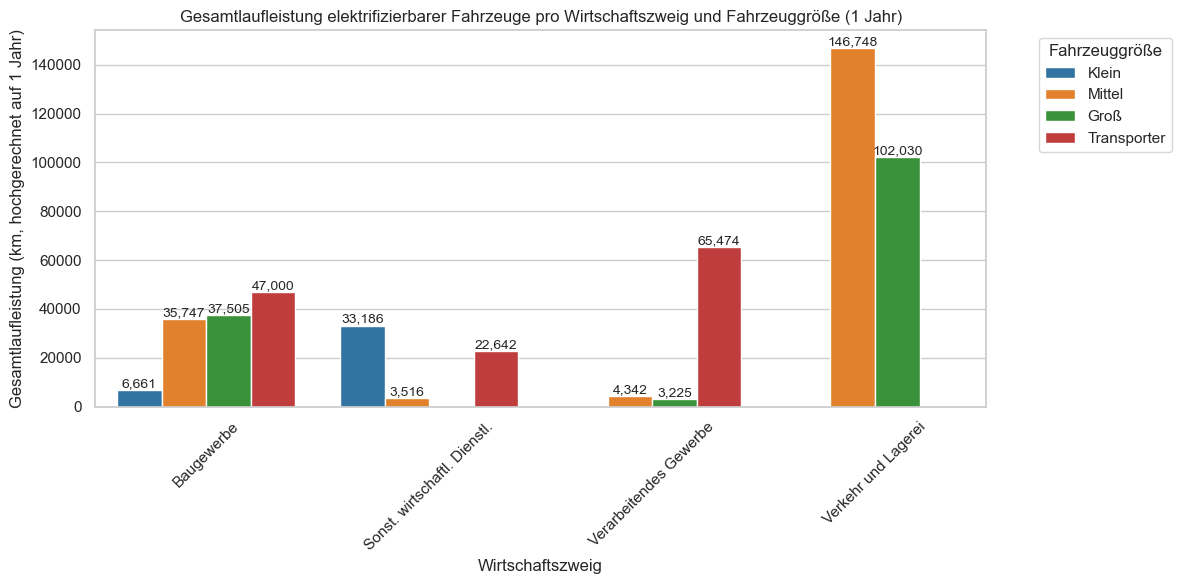

In [15]:
# Filter: Nur elektrifizierbare Fahrzeuge
elektrifizierbare_fahrzeuge = fahrzeuge_df[fahrzeuge_df["electrifiable"] == "yes"].copy()

# Gruppierung: Gesamtlaufleistung (3 Wochen) pro Wirtschaftszweig und Fahrzeuggröße
grouped_data = elektrifizierbare_fahrzeuge.groupby(["Wirtschaftszweig", "vehicle_size"])["total_distance_km"]\
    .sum()\
    .reset_index()

# Skalierungsfaktor von 3 Wochen auf 1 Jahr (52/3 ≈ 17,33)
scaling_factor = 52 / 3

# Gesamtlaufleistung auf ein Jahr hochrechnen
grouped_data["total_distance_km_year"] = grouped_data["total_distance_km"] * scaling_factor

# Benutzerdefinierte Palette für Fahrzeuggrößen (wie im vorherigen Beispiel)
size_palette = {
    "Klein": "#1f77b4",
    "Mittel": "#ff7f0e",
    "Groß": "#2ca02c",
    "Transporter": "#d62728",
    "Sonstige": "#9467bd"
}

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=grouped_data,
    x="Wirtschaftszweig",
    y="total_distance_km_year",
    hue="vehicle_size",
    hue_order=vehicle_size_order,
    palette=size_palette
)

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Gesamtlaufleistung (km, hochgerechnet auf 1 Jahr)")
plt.title("Gesamtlaufleistung elektrifizierbarer Fahrzeuge pro Wirtschaftszweig und Fahrzeuggröße (1 Jahr)")
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Laufleistung pro elektrifizierbarem Fahrzeug

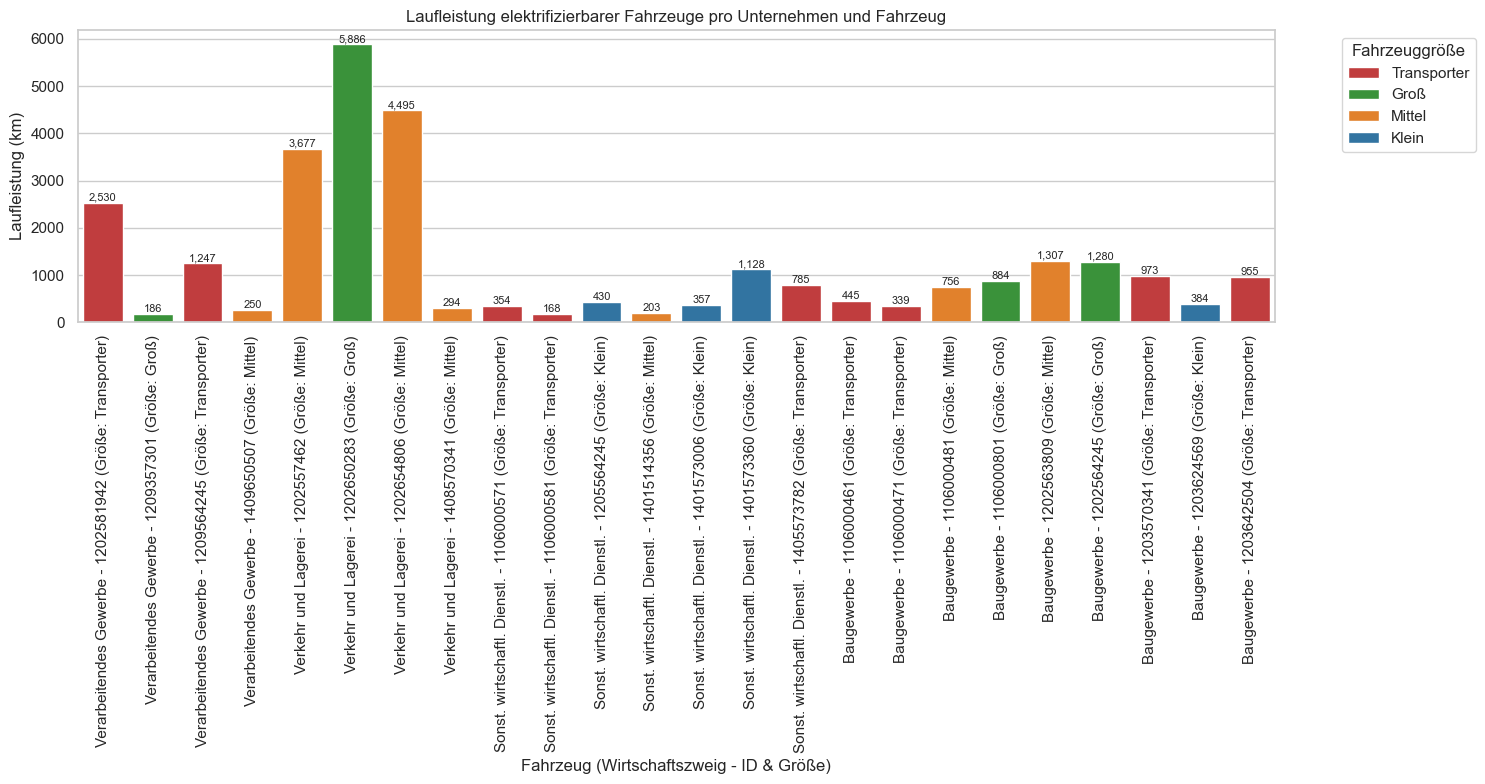

In [16]:
# -------------------------------
# Filter: Nur elektrifizierbare Fahrzeuge
# -------------------------------
elektrifizierbare_fahrzeuge = fahrzeuge_df[fahrzeuge_df["electrifiable"] == "yes"].copy()

# -------------------------------
# Kombiniertes Label erstellen: Wirtschaftszweig - Fahrzeug-ID (Größe)
# -------------------------------
elektrifizierbare_fahrzeuge["combined_label"] = (
    elektrifizierbare_fahrzeuge["Wirtschaftszweig"] + " - " +
    elektrifizierbare_fahrzeuge["vehicle_id"].astype(str) + " (Größe: " +
    elektrifizierbare_fahrzeuge["vehicle_size"] + ")"
)

# -------------------------------
# Benutzerdefinierte Palette für Fahrzeuggrößen
# -------------------------------
size_palette = {
    "Klein": "#1f77b4",
    "Mittel": "#ff7f0e",
    "Groß": "#2ca02c",
    "Transporter": "#d62728",
    "Sonstige": "#9467bd"
}

# -------------------------------
# Plot erstellen
# -------------------------------
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=elektrifizierbare_fahrzeuge,
    x="combined_label",
    y="total_distance_km",
    hue="vehicle_size",
    palette=size_palette,
    dodge=False
)

plt.xlabel("Fahrzeug (Wirtschaftszweig - ID & Größe)")
plt.ylabel("Laufleistung (km)")
plt.title("Laufleistung elektrifizierbarer Fahrzeuge pro Unternehmen und Fahrzeug")
plt.xticks(rotation=90)

# Werte über den Balken anzeigen
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=8)

plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Durchschnittlich Laufleistungen pro Jahr

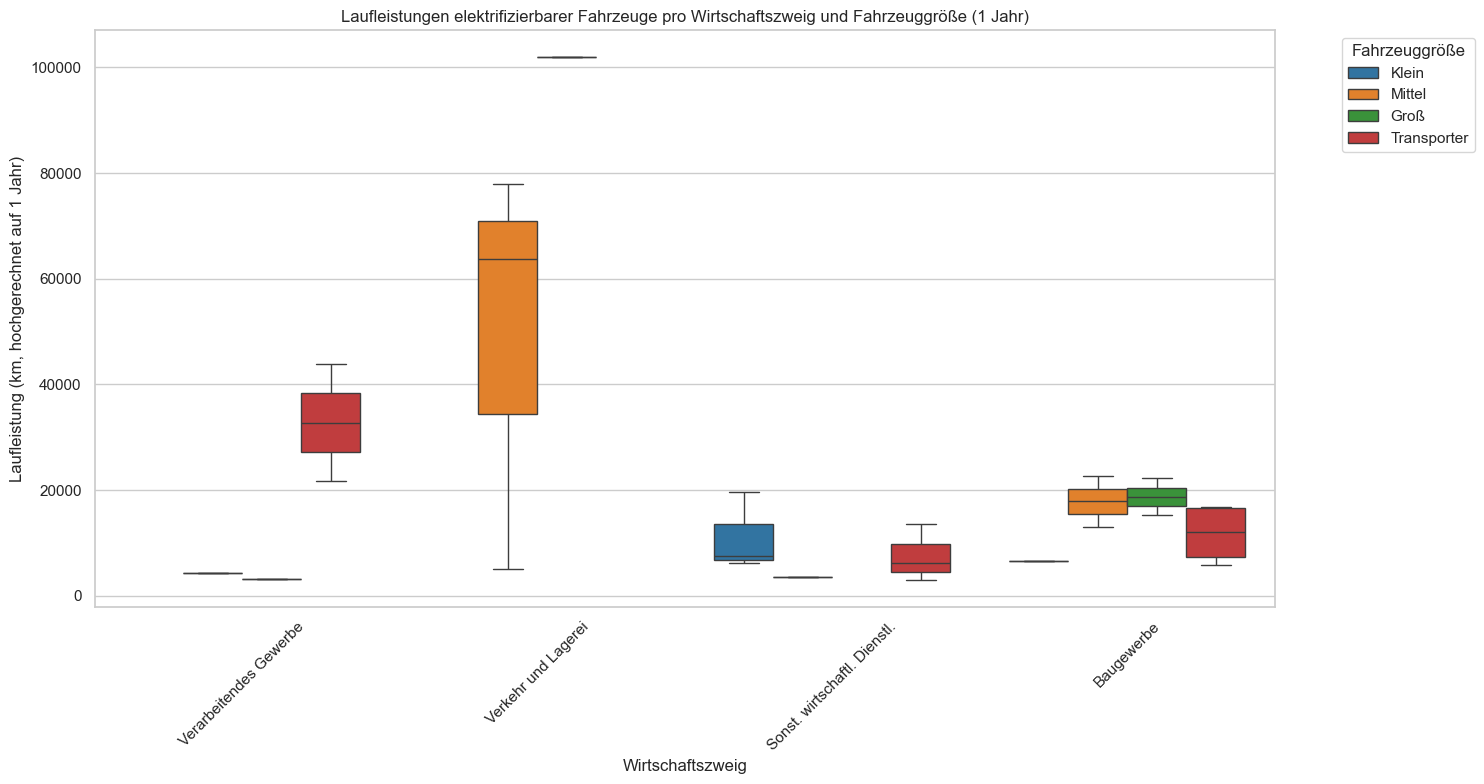

In [17]:
# -------------------------------
# Filter: Nur elektrifizierbare Fahrzeuge
# -------------------------------
elektrifizierbare_fahrzeuge = fahrzeuge_df[fahrzeuge_df["electrifiable"] == "yes"].copy()

# Skalierungsfaktor von 3 Wochen auf 1 Jahr (52/3 ≈ 17,33)
scaling_factor = 52 / 3

# Laufleistungen auf 1 Jahr hochrechnen
elektrifizierbare_fahrzeuge["total_distance_km_year"] = elektrifizierbare_fahrzeuge["total_distance_km"] * scaling_factor

# Reihenfolge für die Fahrzeuggrößen festlegen und nur die gewünschten Kategorien behalten
vehicle_size_order = ["Klein", "Mittel", "Groß", "Transporter"]
elektrifizierbare_fahrzeuge = elektrifizierbare_fahrzeuge[elektrifizierbare_fahrzeuge["vehicle_size"].isin(vehicle_size_order)]
elektrifizierbare_fahrzeuge["vehicle_size"] = pd.Categorical(
    elektrifizierbare_fahrzeuge["vehicle_size"],
    categories=vehicle_size_order,
    ordered=True
)

# Benutzerdefinierte Palette für Fahrzeuggrößen
size_palette = {
    "Klein": "#1f77b4",
    "Mittel": "#ff7f0e",
    "Groß": "#2ca02c",
    "Transporter": "#d62728"
}

# -------------------------------
# Boxplot erstellen
# -------------------------------
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(
    data=elektrifizierbare_fahrzeuge,
    x="Wirtschaftszweig",
    y="total_distance_km_year",
    hue="vehicle_size",
    palette=size_palette
)

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Laufleistung (km, hochgerechnet auf 1 Jahr)")
plt.title("Laufleistungen elektrifizierbarer Fahrzeuge pro Wirtschaftszweig und Fahrzeuggröße (1 Jahr)")
plt.xticks(rotation=45)

plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Verbrenner für Berechnungen

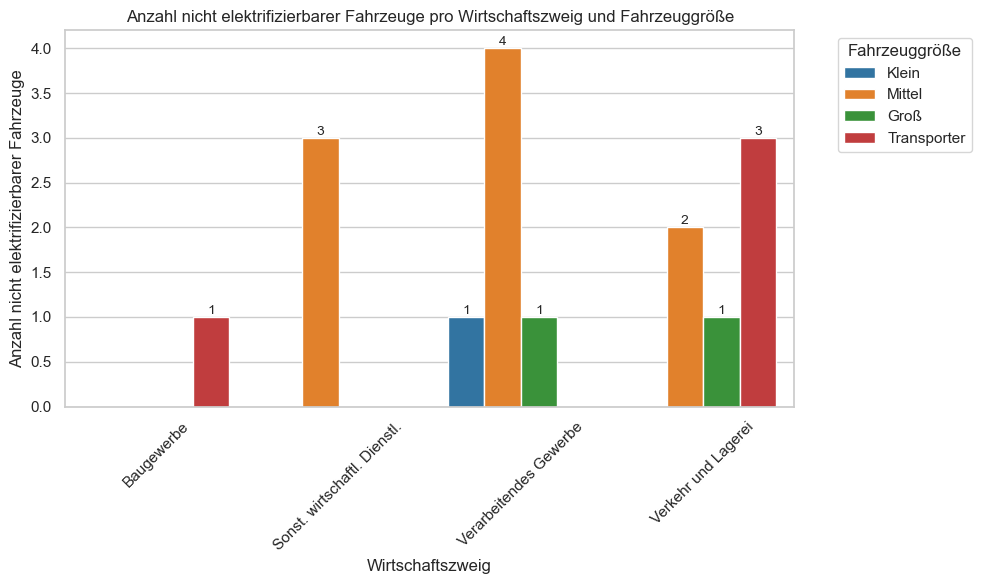

In [18]:
# Filter: Nur elektrifizierbare Fahrzeuge
elektrifizierbare_fahrzeuge = fahrzeuge_df[fahrzeuge_df["electrifiable"] == "no"].copy()

# Gruppierung: Anzahl der Fahrzeuge pro Wirtschaftszweig und Fahrzeuggröße
count_data = elektrifizierbare_fahrzeuge.groupby(["Wirtschaftszweig", "vehicle_size"])["vehicle_id"] \
    .count() \
    .reset_index(name="count")

# Optional: Herausfiltern von "Sonstige", damit nur die 4 gewünschten Kategorien angezeigt werden
count_data = count_data[count_data["vehicle_size"].isin(["Klein", "Mittel", "Groß", "Transporter"])]

# Reihenfolge für die Fahrzeuggrößen festlegen
vehicle_size_order = ["Klein", "Mittel", "Groß", "Transporter"]
count_data["vehicle_size"] = pd.Categorical(count_data["vehicle_size"],
                                            categories=vehicle_size_order,
                                            ordered=True)

# Benutzerdefinierte Palette für die 4 Fahrzeuggrößen
size_palette = {
    "Klein": "#1f77b4",
    "Mittel": "#ff7f0e",
    "Groß": "#2ca02c",
    "Transporter": "#d62728"
}

# Plot erstellen
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=count_data,
    x="Wirtschaftszweig",
    y="count",
    hue="vehicle_size",
    hue_order=vehicle_size_order,
    palette=size_palette
)

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Anzahl nicht elektrifizierbarer Fahrzeuge")
plt.title("Anzahl nicht elektrifizierbarer Fahrzeuge pro Wirtschaftszweig und Fahrzeuggröße")
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

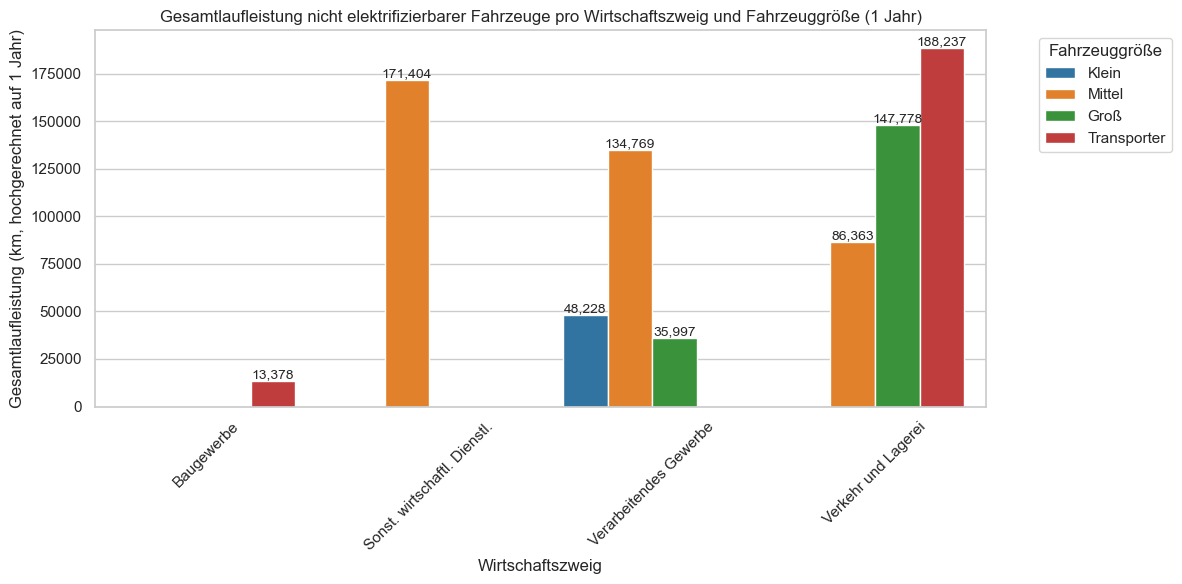

In [19]:
# Filter: Nur elektrifizierbare Fahrzeuge
elektrifizierbare_fahrzeuge = fahrzeuge_df[fahrzeuge_df["electrifiable"] == "no"].copy()

# Gruppierung: Gesamtlaufleistung (3 Wochen) pro Wirtschaftszweig und Fahrzeuggröße
grouped_data = elektrifizierbare_fahrzeuge.groupby(["Wirtschaftszweig", "vehicle_size"])["total_distance_km"]\
    .sum()\
    .reset_index()

# Skalierungsfaktor von 3 Wochen auf 1 Jahr (52/3 ≈ 17,33)
scaling_factor = 52 / 3

# Gesamtlaufleistung auf ein Jahr hochrechnen
grouped_data["total_distance_km_year"] = grouped_data["total_distance_km"] * scaling_factor

# Benutzerdefinierte Palette für Fahrzeuggrößen (wie im vorherigen Beispiel)
size_palette = {
    "Klein": "#1f77b4",
    "Mittel": "#ff7f0e",
    "Groß": "#2ca02c",
    "Transporter": "#d62728",
    "Sonstige": "#9467bd"
}

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=grouped_data,
    x="Wirtschaftszweig",
    y="total_distance_km_year",
    hue="vehicle_size",
    hue_order=vehicle_size_order,
    palette=size_palette
)

plt.xlabel("Wirtschaftszweig")
plt.ylabel("Gesamtlaufleistung (km, hochgerechnet auf 1 Jahr)")
plt.title("Gesamtlaufleistung nicht elektrifizierbarer Fahrzeuge pro Wirtschaftszweig und Fahrzeuggröße (1 Jahr)")
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()